# Clustering
Idea: use different clustering algorithms and see if they correctly cluster the thermal comfort

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import sns as sns
import torch
import torch.optim as optim
import seaborn as sns

# Import data

In [95]:
### Load the data
seed = 90 # 12: test better as train
data_path = 'data/output/data_complete_2022-06-16.csv'
df = pd.read_csv(data_path)

In [96]:
df

,dataset,Outside Temperature,Avg. Temperature,RH,va,Tg,Gender,Age,Height,Weight,Duration,Icl,Thermal feeling (global)
0,August,15.69,18.560,73.440,0.040,17.870,0,23,169,74,7.5,1.06280,-2
1,August,15.59,19.185,74.410,0.155,18.125,1,18,186,105,22.5,0.82065,0
2,August,15.69,19.580,73.255,0.020,18.905,0,33,160,45,7.5,0.72045,0
3,August,15.69,19.105,73.275,0.240,18.155,0,26,167,59,7.5,0.65365,-1
4,August,15.69,19.050,77.180,0.240,18.620,0,47,172,70,7.5,0.74550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,April,8.10,18.265,58.815,0.070,19.625,1,34,186,78,12.5,1.07115,0
274,April,7.90,18.265,58.885,0.070,19.625,0,26,172,64,12.5,1.24650,1
275,April,7.90,17.325,58.420,0.080,19.155,1,26,180,85,10.0,1.27155,0
276,April,7.70,17.020,69.170,0.070,16.690,1,27,185,95,2.5,1.09620,-1


# Scale Data

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(df.drop(columns=['dataset', 'Thermal feeling (global)']))
X = df.drop(columns=['dataset', 'Thermal feeling (global)']).to_numpy()
df['Thermal feeling (global)'] = df['Thermal feeling (global)'] - df['Thermal feeling (global)'].min()
y = df['Thermal feeling (global)']

# Cluster

In [98]:
k = y.unique().shape[0]

In [99]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
df['k_means'] = kmeans.labels_


from sklearn.decomposition import NMF
model = NMF(n_components=k, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_
df['nmf'] = np.argmax(W, axis=1)

from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X, y)
df['svm'] = clf.predict(X)


/home/anuar/PycharmProjects/termische_comfort/venv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(
/home/anuar/PycharmProjects/termische_comfort/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


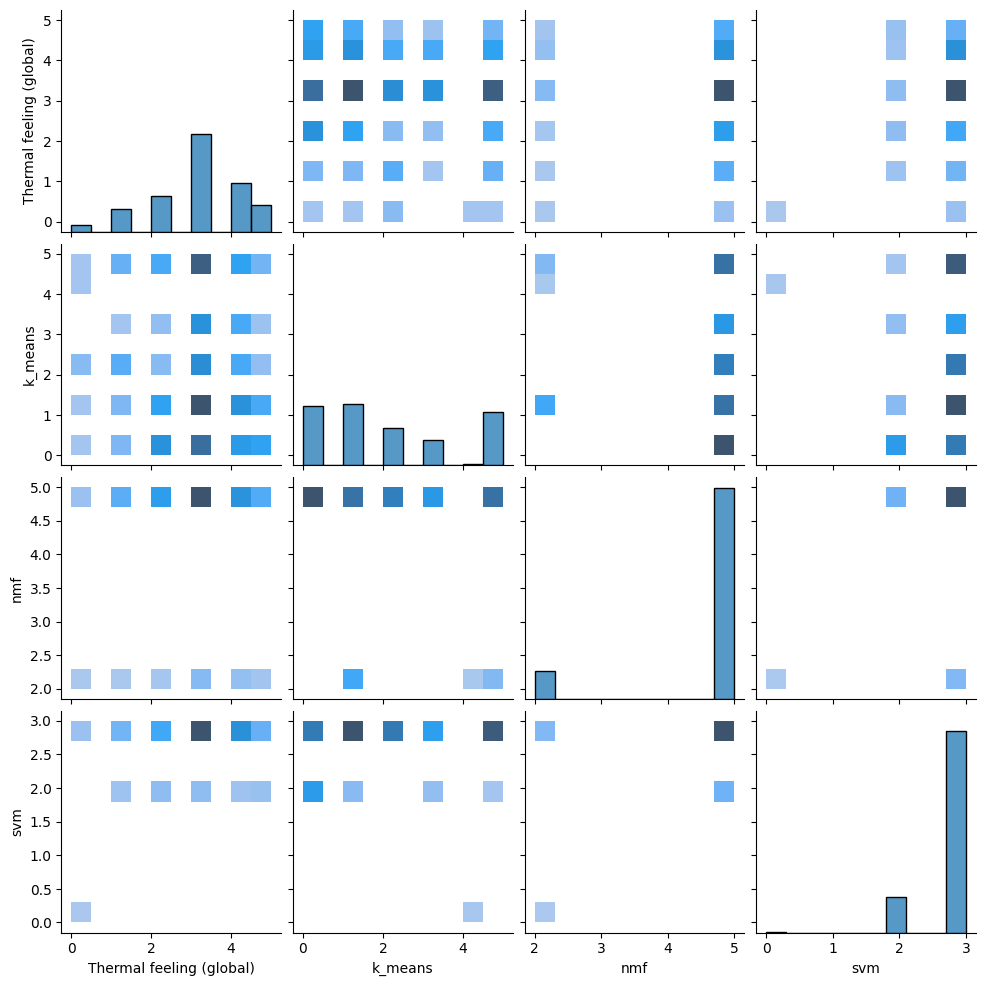

In [100]:
sns.pairplot(df[['Thermal feeling (global)', 'k_means', 'nmf','dataset', 'svm']], kind='hist')
plt.show()

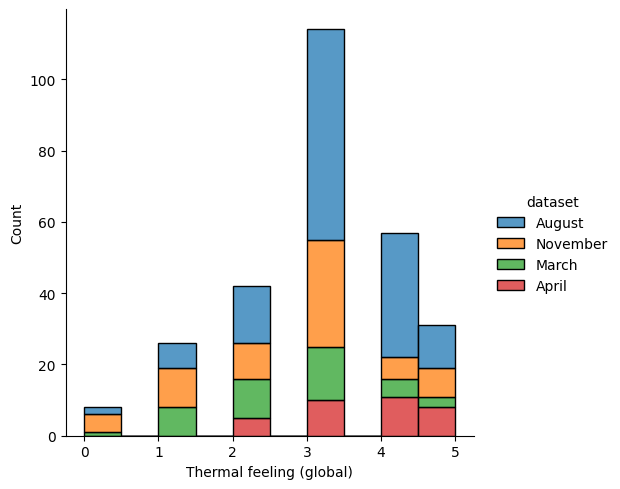

In [101]:
sns.displot(data=df, x="Thermal feeling (global)", hue="dataset", multiple="stack")
plt.show()

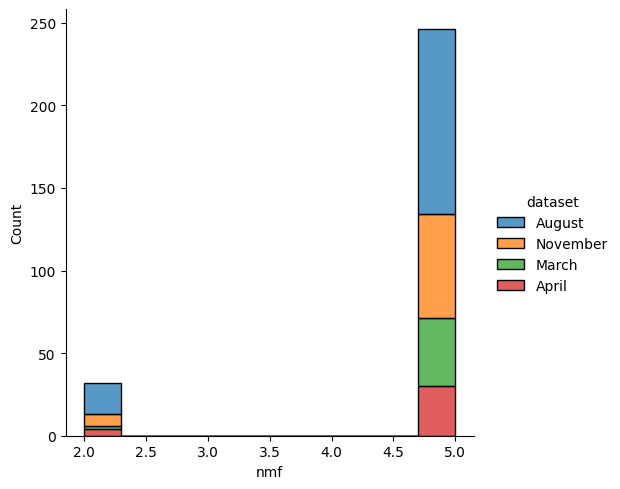

In [102]:
sns.displot(data=df, x="nmf", hue="dataset", multiple="stack")
plt.show()

In [103]:
H

array([[0.00000000e+00, 3.05844503e+00, 1.91544358e+00, 0.00000000e+00,
        3.05614514e+00, 0.00000000e+00, 0.00000000e+00, 5.45385107e+01,
        0.00000000e+00, 1.72384253e+00, 4.29330415e-01],
       [0.00000000e+00, 4.14050077e-01, 0.00000000e+00, 0.00000000e+00,
        4.01479762e-01, 0.00000000e+00, 1.49373014e+01, 5.50145830e+00,
        0.00000000e+00, 3.16943148e-01, 6.43635314e-02],
       [4.59499718e-01, 5.30625024e-01, 7.38908704e+00, 4.88127964e-03,
        4.61179936e-01, 0.00000000e+00, 6.47729482e-01, 4.37274108e+00,
        0.00000000e+00, 0.00000000e+00, 3.69771857e-02],
       [6.58357918e+00, 8.06561159e+00, 0.00000000e+00, 5.28068425e-02,
        8.31674688e+00, 6.23964842e-04, 0.00000000e+00, 4.35733662e+01,
        7.93293299e+00, 0.00000000e+00, 1.20233119e-01],
       [1.18239785e+00, 8.08290862e-01, 8.47972903e+00, 1.22043021e-02,
        7.30679524e-01, 3.71918745e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.63183742e+00, 0.00000000e+

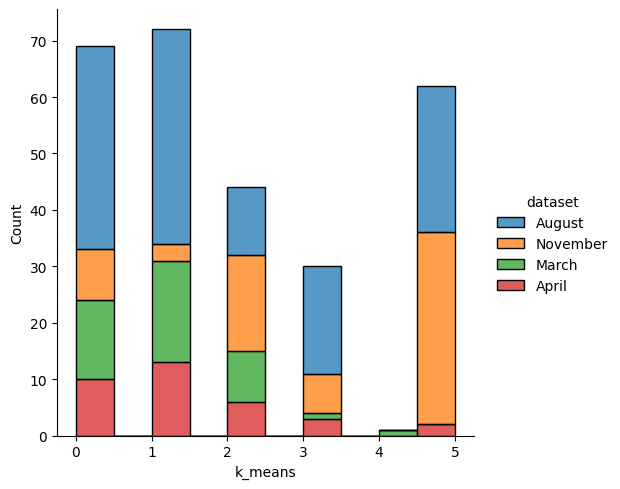

In [104]:
sns.displot(data=df, x="k_means", hue="dataset", multiple="stack")
plt.show()

In [105]:
kmeans.cluster_centers_

array([[1.35756522e+01, 1.93724058e+01, 5.67152899e+01, 1.06231884e-01,
        1.92447826e+01, 9.56521739e-01, 2.72898551e+01, 1.83985507e+02,
        8.34492754e+01, 1.45652174e+01, 9.27263768e-01],
       [1.39188889e+01, 1.97081250e+01, 5.44461806e+01, 1.09027778e-01,
        1.96949306e+01, 1.66666667e-01, 2.81527778e+01, 1.65888889e+02,
        5.61388889e+01, 1.01736111e+01, 9.56105556e-01],
       [1.09318182e+01, 1.69961364e+01, 6.12361364e+01, 1.13522727e-01,
        1.66873864e+01, 1.59090909e-01, 6.67045455e+01, 1.67068182e+02,
        6.75454545e+01, 1.17045455e+01, 1.06204091e+00],
       [1.38073333e+01, 1.93271667e+01, 6.46795000e+01, 1.36500000e-01,
        1.89360000e+01, 8.33333333e-01, 4.98000000e+01, 1.81066667e+02,
        9.83000000e+01, 1.24166667e+01, 8.40690000e-01],
       [1.04000000e+01, 1.86200000e+01, 3.50000000e+01, 1.00000000e-02,
        1.85000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.50000000e+00, 9.37550000e-

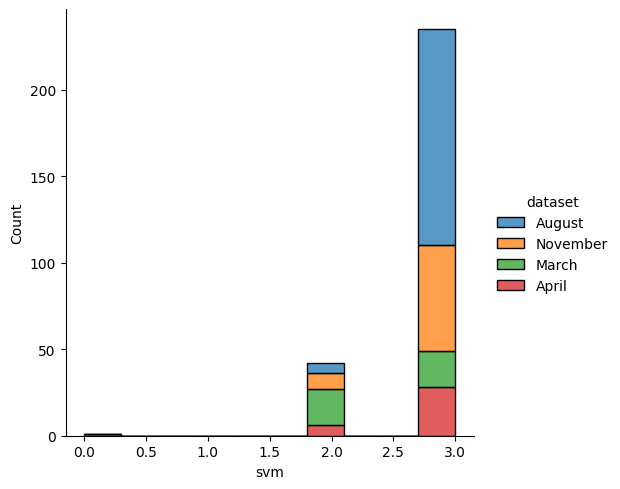

In [106]:
sns.displot(data=df, x="svm", hue="dataset", multiple="stack")
plt.show()